# PULSAR CLASSIFICATION PROJECT!
## DSCI 100 007
### Group 36
#### Ruirui Ma, Emilio Rodriguez-Sanin, William Tan, Jinay Borana


In [26]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

## Set Up

In [5]:
# RUN ME TO DOWNLOAD THE NEEDED FILE FOR ANALYSIS
download.file("https://archive.ics.uci.edu/static/public/372/htru2.zip", destfile = "./htru.zip")
unzip("./htru.zip", exdir = "data/") #unzip the zip to data folder

### Reading Data

In [16]:
pulsar_data = read_csv("data/HTRU_2.csv", col_names=c("Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis", "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis", "class")) |>
              mutate(class = as.factor(class))
pulsar_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Profile_mean, Profile_stdev, Profile_skewness, Profile_kurtosis, DM...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     140.5625     55.68378      -0.2345714       -0.6996484       3.199833  
2     102.5078     58.88243       0.4653182       -0.5150879       1.677258  
3     103.0156     39.34165       0.3233284        1.0511644       3.121237  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
17896 119.3359     59.93594      0.1593631        -0.74302540       21.430602
17897 114.5078     53.90240      0.2011614        -0.02478884        1.946488
17898  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     19.11043  7.975532    74.24222   0    
2     14.86015 10.576487   127.39358   0    
3     21.74467  7.735822    63.17191   0    
⋮     ⋮        ⋮           ⋮           ⋮    
17896 58.87200  2.499517     4.595173  0    
17897 13.38173 10.007967   134.238910  0    
17898 64.71256 -1.597527     1.429475  0

In [29]:
#initial_split of data
pulsar_split = initial_split(pulsar_data, prop = .75, strata = class)
pulsar_training = training(pulsar_split)
pulsar_testing = testing(pulsar_split)

pulsar_training
pulsar_testing

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean   
1     102.50781    58.88243       0.46531815      -0.5150879       1.677258  
2     136.75000    57.17845      -0.06841464      -0.6362384       3.642977  
3      88.72656    40.67223       0.60086608       1.1234917       1.178930  
⋮     ⋮            ⋮             ⋮                ⋮                ⋮         
13421 119.3359     59.93594      0.1593631        -0.74302540       21.430602
13422 114.5078     53.90240      0.2011614        -0.02478884        1.946488
13423  57.0625     85.79734      1.4063910         0.08951971      188.306020
      DM_stdev DM_skewness DM_kurtosis class
1     14.86015 10.576487   127.39358   0    
2     20.95928  6.896499    53.59366   0    
3     11.46872 14.269573   252.56731   0    
⋮     ⋮        ⋮           ⋮           ⋮    
13421 58.87200  2.499517     4.595173  0    
13422 13.38173 10.007967   134.238910  0    
13423 64.71256 -1.597527     1.429475  0

Profile_mean Profile_stdev Profile_skewness Profile_kurtosis DM_mean  
1    140.5625     55.68378      -0.2345714       -0.6996484       3.199833 
2    103.0156     39.34165       0.3233284        1.0511644       3.121237 
3    107.2500     52.62708       0.4526880        0.1703474       2.331940 
⋮    ⋮            ⋮             ⋮                ⋮                ⋮        
4473 133.8203     43.47816      0.136691092       0.3531212       0.9824415
4474 127.0703     47.66356      0.006552426      -0.1236337       0.8536789
4475 121.3750     53.24516      0.103772205      -0.3651187       1.0953177
     DM_stdev  DM_skewness DM_kurtosis class
1    19.11043  7.975532     74.24222   0    
2    21.74467  7.735822     63.17191   0    
3    14.48685  9.001004    107.97251   0    
⋮    ⋮         ⋮           ⋮           ⋮    
4473  9.486068 18.52839    444.4117    0    
4474 11.197206 16.12270    296.5077    0    
4475 12.239976 16.25804    303.8800    0

## Preliminary Exploratory Data

In [32]:
pulsar_summary  = pulsar_training |>
                  group_by(class) |>
                  summarize(count = n())
pulsar_summary

class count
1 0     12201
2 1      1222

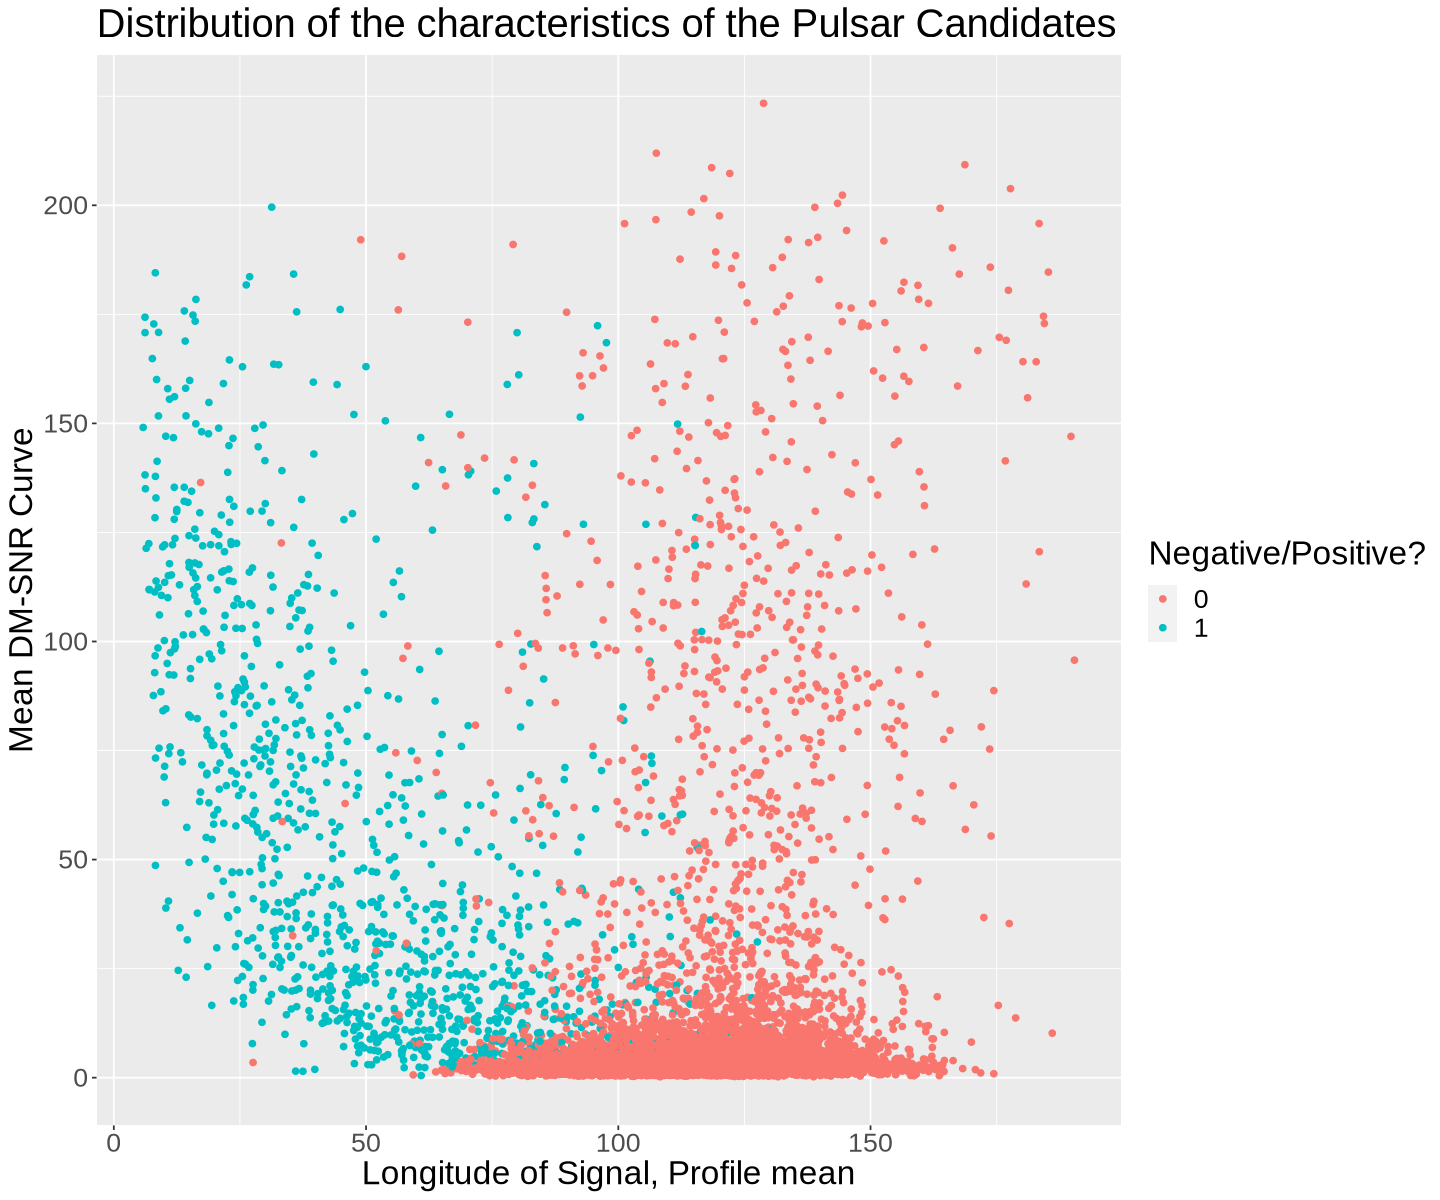

In [31]:
options(repr.plot.width = 12, repr.plot.height = 10)

pulsar_prelim_graph = pulsar_training |>
                      ggplot(aes(x=Profile_mean, y=DM_mean, color = class))+
                      geom_point()  +
                      labs(x= "Longitude of Signal, Profile mean", y = "Mean DM-SNR Curve", color = "Negative/Positive?")+
                      ggtitle("Distribution of the characteristics of the Pulsar Candidates") +
                      theme(text = element_text(size = 20))
pulsar_prelim_graph

In [25]:
#Save Image to a JPG file
ggsave("prelim_graph.jpg",pulsar_prelim_graph, width = 12, height =10)